In [1]:
#吴恩达ex2#########################################################################################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from load_data import load_data
from logicRegression import logic, sigmoid

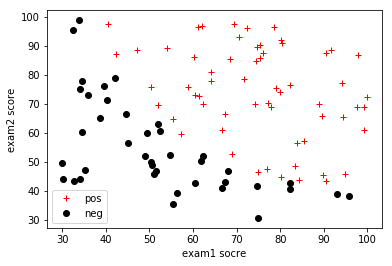

In [2]:
#1.1 Visualizing the data#########################################################################################
# 加载数据文件
df = pd.read_table('/home/sjl/桌面/machine learning/mlclass-ex2-005/mlclass-ex2/ex2data1.txt', sep=',', header=None)
m = df.iloc[:, -1]==1
pos = df[m] # 能进入大学
n = df.iloc[:, -1]==0
neg = df[n] #　不能进入大学
plt.plot(pos.iloc[:, 0], pos.iloc[:, 1], 'r+', neg.iloc[:, 0], neg.iloc[:, 1], 'ko')
plt.xlabel('exam1 socre')
plt.ylabel('exam2 score')
plt.legend(['pos', 'neg'], loc='best')
plt.show()

In [6]:
#1.2.3 Learning parameters using fminunc##########################################################################
x, y = load_data('/home/sjl/桌面/machine learning/mlclass-ex2-005/mlclass-ex2/ex2data1.txt')
m, n = x.shape
initial_theta = np.zeros(n+1)
l = logic(x, y, initial_theta) # 创建一个逻辑回归对象
theta = l.fit_cg() # 逻辑回归的模型参数
theta

/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)


         Current function value: 0.203498
         Iterations: 232
         Function evaluations: 1169
         Gradient evaluations: 1156


array([-25.16033083,   0.20622369,   0.20146348])

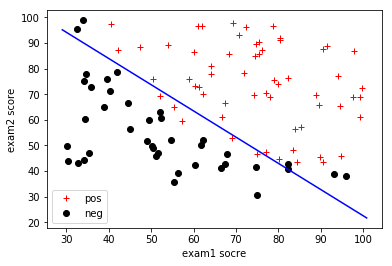

In [7]:
#plot DecisionBoundary############################################################################################
plot_x1 = np.array([x[:, 0].max()+1, x[:, 0].min()-1])
plot_x2 = -(theta[0] + theta[1]*plot_x1)/theta[2]
plt.plot(pos.iloc[:, 0], pos.iloc[:, 1], 'r+', neg.iloc[:, 0], neg.iloc[:, 1], 'ko')
plt.plot(plot_x1, plot_x2, 'b') # 画决策边界
plt.xlabel('exam1 socre')
plt.ylabel('exam2 score')
plt.legend(['pos', 'neg'], loc='best')
plt.show()

In [8]:
#1.2.4 Evaluating logistic regression##############################################################################
predict_x = [1, 45, 85]
sigmoid(np.dot(predict_x, theta)) # 预测学生上学的概率0.776正确
##　预测函数参考logic.predict函数

0.776282351763

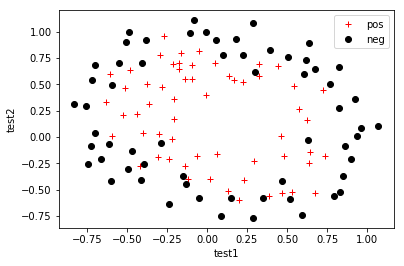

In [9]:
#2 Regularized logistic regression#################################################################################
#2.1 Visualizing the data##########################################################################################
df = pd.read_table('/home/sjl/桌面/machine learning/mlclass-ex2-005/mlclass-ex2/ex2data2.txt', sep=',', header=None)
m = df.iloc[:, -1]==1
pos = df[m] # 正类，能通过检测
n = df.iloc[:, -1]==0
neg = df[n] # 负类，　不能通过检测
plt.plot(pos.iloc[:, 0], pos.iloc[:, 1], 'r+', neg.iloc[:, 0], neg.iloc[:, 1], 'ko') # 可视化
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend(['pos', 'neg'])
plt.show()

In [10]:
# 2.2Feature mapping###############################################################################################
# 特征映射,有一点绕
x, y = load_data('/home/sjl/桌面/machine learning/mlclass-ex2-005/mlclass-ex2/ex2data2.txt')
degree = 6 # 映射到６次阶
def feature_mapping(x):
    m, n = x.shape # ｘ的形状
    out = np.ones((m, 1))
    for i in range(1, degree+1): # i代表x1,x2的阶次和
        for j in range(0, i+1):
            x0 = x[:, 0]**(i-j)*x[:, 1]**j
            out = np.insert(out, -1, values=x0, axis=1)
    return out[:, :-1] # 去掉[1, 1, 1...]这一列，因为逻辑回归里的类已经帮助添加x0了
new_x = feature_mapping(x) # 获取映射后生成的新特征值
new_x

array([[ 5.12670000e-02,  6.99560000e-01,  2.62830529e-03, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [-9.27420000e-02,  6.84940000e-01,  8.60107856e-03, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [-2.13710000e-01,  6.92250000e-01,  4.56719641e-02, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [-4.84450000e-01,  9.99270000e-01,  2.34691802e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [-6.33640000e-03,  9.99270000e-01,  4.01499650e-05, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 6.32650000e-01, -3.06120000e-02,  4.00246023e-01, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

In [11]:
# 2.3 Cost function################################################################################################
m, n = new_x.shape # 新的特征值的形状
initial_theta = np.zeros(n+1)
l = logic(new_x, y, initial_theta, lamda=0.1)
cost = l.cost(initial_theta)
cost # 代价函数值等于0.693,正确

0.6931471805599454

In [12]:
# 2.3.1 Learning parameters using fminunc##########################################################################
theta = l.fit_cg() # BFGS算法计算模型参数theta, 共轭梯度算法不如其精确
theta

         Current function value: 0.403611
         Iterations: 10
         Function evaluations: 100
         Gradient evaluations: 89


array([ 2.93305369e+00,  2.22817278e+00,  3.42345430e+00, -4.87520232e+00,
       -3.72563311e+00, -4.09363098e+00,  8.81425885e-01, -1.44730688e+00,
       -1.34130924e+00, -1.80460329e-01, -3.92779862e+00, -3.09305675e-01,
       -1.85815151e+00, -1.39904310e+00, -3.24492996e+00, -5.52979982e-01,
       -7.93923520e-01, -2.37166806e-02, -9.85814383e-01, -1.33894924e+00,
       -8.69637458e-01, -3.08310909e+00,  3.84648865e-03, -8.65396796e-01,
       -1.87590871e-03, -1.04268777e+00, -9.19007592e-01, -2.36988601e+00])

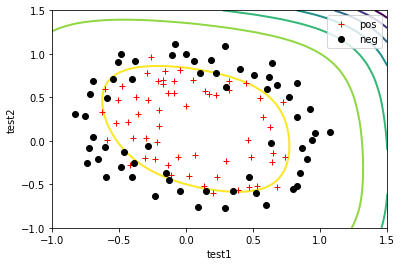

In [13]:
# 2.5 Optional (ungraded) exercises画决策边界#######################################################################
# 先画出数据的分布图, 暂时不正确(以后处理)
plt.plot(pos.iloc[:, 0], pos.iloc[:, 1], 'r+', neg.iloc[:, 0], neg.iloc[:, 1], 'ko') # 可视化
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend(['pos', 'neg'])
# 画决策边界,实际上可以用等高线替代
# u, v可以认为是我给定的特征值
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
# 映射后的新特征值
s = feature_mapping(np.array([u, v]).T)
m, n = s.shape
# s = np.insert(s, 0, values=s0, axis=1) # 等同于加入x0
# z = np.dot(s, theta) # 计算z,这里h=g(z),z=0是分类的重要依据
z = np.zeros((len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        x = np.array([[u[i], v[j]]])
        s = feature_mapping(x)
        s = np.insert(s, 0, values=np.ones(1), axis=1)
        z[i, j] = np.dot(s, theta)
# 画等高线
# u, v = np.meshgrid(u, v)
plt.contour(u, v, z.T, linewidths=2.0)
plt.show()

In [14]:
#ex3 Multi-class Classification#################################################################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [15]:
# 加载数据######################################################################################################
data = loadmat('/home/sjl/桌面/machine learning/mlclass-ex3-005/mlclass-ex3/ex3data1.mat')
x = data['X']
y = data['y']
y[y==10] = 0 # 因为matalab以1算起,所以NG将0输成10,这里将其变回来

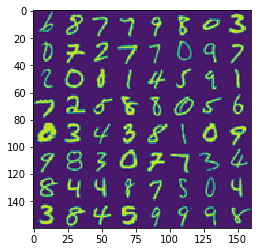

In [16]:
# 1.2 Visualizing the data######################################################################################
import math
rand = np.random.randint(0, 4999, size=67)
rand_x = x[rand] # 随机取出100行
# m, n = rand_x.shape
# i = int(math.sqrt(m))
# j = m//i
# image = np.zeros((i*20, j*20))
# image.shape
# for k in range(i):
#          for s in range(j):
#             image[k*20:(k+1)*20, s*20:(s+1)*20] = rand_x[10*k + s].reshape(20, 20)

# plt.imshow(image.T, cmap='gray')
# 展示数据
def displayData(x):
    m, n = x.shape
    i = int(math.sqrt(m)) # 一行数字的个数
    j = m//i #一列数字的个数
    image = np.zeros((i*20, j*20))
    for k in range(i):
        for s in range(j):
            image[k*20:(k+1)*20, s*20:(s+1)*20] = x[j*k + s].reshape(20, 20)
    return image
image = displayData(rand_x)
plt.imshow(image.T)
plt.show()

In [18]:
# 手写数字识别######################################################################################################
def onevsAll(x, y, sort_num):
    m, n = x.shape
    Y = np.zeros((m, sort_num))
    for i in range(sort_num):
        Ｙ[:, i] = np.int32(y==i).reshape(1, -1)
    theta = np.zeros((n+1, sort_num))
    initial_theta = np.zeros(n+1)
    for i in range(sort_num):
        l = logic(x, Y[:, i], initial_theta)
        theta[:, i] = l.fit_bfgs()
    return theta

In [19]:
theta = onevsAll(x, y, 10)
print(theta)

/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:11: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)


         Current function value: nan
         Iterations: 96
         Function evaluations: 721
         Gradient evaluations: 721


/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:11: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)


         Current function value: nan
         Iterations: 94
         Function evaluations: 708
         Gradient evaluations: 708


/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegre

/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)


         Current function value: 0.032334
         Iterations: 124
         Function evaluations: 1703
         Gradient evaluations: 1691


/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegre

/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)


         Current function value: 0.043849
         Iterations: 126
         Function evaluations: 1818
         Gradient evaluations: 1806


/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)


         Current function value: nan
         Iterations: 98
         Function evaluations: 653
         Gradient evaluations: 653


/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegre

/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)


         Current function value: 0.034502
         Iterations: 128
         Function evaluations: 1769
         Gradient evaluations: 1757


/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegre

/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegre

         Current function value: 0.005467
         Iterations: 120
         Function evaluations: 1871
         Gradient evaluations: 1862


/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)


         Current function value: nan
         Iterations: 87
         Function evaluations: 584
         Gradient evaluations: 584


/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:11: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:11: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:11: RuntimeWarning: overflow encountered 

         Current function value: nan
         Iterations: 886
         Function evaluations: 5785
         Gradient evaluations: 5785


/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: divide by zero encountered in log
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegression/logicRegression.py:37: RuntimeWarning: invalid value encountered in multiply
  cost = self.y*np.log(h) + (1 - self.y)*np.log(1-h)
/home/sjl/桌面/CoCo/logicRegre

         Current function value: 0.050046
         Iterations: 353
         Function evaluations: 3155
         Gradient evaluations: 3144
[[-7.65261422e+00 -9.79955380e+00 -5.22155691e+00 ... -4.40571358e+00
  -1.33950538e+01 -8.53894796e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-2.39318671e-01  8.63866945e-02  1.39560084e+00 ... -3.00729910e-01
  -1.30403155e+01 -4.12823791e-01]
 [ 2.09856565e-02  1.57104527e-03 -1.34199246e-01 ...  4.03531019e-02
   1.50919166e+00  2.49513901e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [44]:
theta

array([[-3.43188546e+01, -1.29795448e+01, -5.73385226e+00, ...,
        -2.83536426e+00, -1.20618593e+01, -8.29824104e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-3.98191773e-04,  6.48177874e-02,  1.85850133e-01, ...,
        -2.45944685e-02, -2.88629848e-01, -1.04621339e-01],
       [ 1.71893670e-05,  1.15947902e-07, -1.06636581e-02, ...,
         2.86106968e-03,  3.33419804e-02,  3.31646718e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])